## dependencias

In [10]:
import sys
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Ejercicio 1

### datos

In [3]:
a_matrix =         np.array([[ 1,  1,  1,  1, 10],
                    [ 1,  1,  1,  1, 11],
                    [ 1,  1,  1,  1, 12],
                    [ 1,  1,  1,  1, 13]]).astype(np.float64)
a_matrix

array([[ 1.,  1.,  1.,  1., 10.],
       [ 1.,  1.,  1.,  1., 11.],
       [ 1.,  1.,  1.,  1., 12.],
       [ 1.,  1.,  1.,  1., 13.]])

### implementacion

In [4]:
##item a
def elim_gauss_sin_pivot(M): 
   for i in range(0, len(M[0]) - 2):
    for j in range(i+1, len(M)):
      if M[i][i] != 0:
        m_ji = M[j][i]/M[i][i]
        for k in range(i,len(M[0])):
          M[j][k] = M[j][k] - m_ji * M[i][k]
      else:
        for jerror in range(i+1, len(M)):
          if M[jerror][i] != 0:
            raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
   return M

def solve_sys_EGsin(M):
  M_res = elim_gauss_sin_pivot(M)
  x = back_subs(M_res)
  return x

def back_subs(M):
  n = len(M)
  x=[]
  for i in range(n):
    x.append(np.float64(0))
  for i in reversed(range(n)):
    x[i]= (M[i][n-1])
    if(M[i][i]!=0.0):
      for j in range(i+1,n):
        if(M[i][j]!=0.0):
          x[i]= x[i]- M[i][j]*x[j] 
      x[i] = x[i]/M[i][i]
    else:
      x[i]= f"x{i}"
  return x

elim_gauss_sin_pivot(a_matrix)
#solve_sys_EGsin(a_matrix)



array([[ 1.,  1.,  1.,  1., 10.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0.,  0.,  3.]])

## Ejercicio 2

### Datos

In [5]:
b_matrix =         np.array([[ 1,  1,  1,  1, 10],
                    [ 1,  1,  1,  1, 11],
                    [ 1,  2,  1,  1, 12],
                    [ 1,  2,  1,  1, 13]]).astype(np.float64)

a_matrix2 = np.array([[ 1,  1,  0,  0, 0],
                     [ 2,  0,  0,  0, 0],
                     [ 0,  2,  1,  4, 0],
                     [ 0,  0,  2,  1, 0]]).astype(np.float64)

#Funcion para la experimentacion del item c)
def create_matrix_with_epsilon_float64(epsilon):
    c_matrix = np.array([[ 1,  2+epsilon,  3-epsilon,  6],
                     [ 1-epsilon,  2,  3+epsilon,  6],
                     [ 1+epsilon,  2-epsilon,  3,  6]]).astype(np.float64)
    return c_matrix

def create_matrix_with_epsilon_float32(epsilon):
    c_matrix = np.array([[ 1,  2+epsilon,  3-epsilon,  6],
                     [ 1-epsilon,  2,  3+epsilon,  6],
                     [ 1+epsilon,  2-epsilon,  3,  6]]).astype(np.float32)
    return c_matrix

x_64=np.array([1,1,1]).astype(np.float64)
x_32=np.array([1,1,1]).astype(np.float32)
for i in np.logspace(1e-6, 10, endpoint=True):
    print(create_matrix_with_epsilon_float64(i))

[[ 1.00000000e+00  3.00000230e+00  1.99999770e+00  6.00000000e+00]
 [-2.30258774e-06  2.00000000e+00  4.00000230e+00  6.00000000e+00]
 [ 2.00000230e+00  9.99997697e-01  3.00000000e+00  6.00000000e+00]]
[[ 1.          3.59986233  1.40013767  6.        ]
 [-0.59986233  2.          4.59986233  6.        ]
 [ 2.59986233  0.40013767  3.          6.        ]]
[[ 1.          4.55955358  0.44044642  6.        ]
 [-1.55955358  2.          5.55955358  6.        ]
 [ 3.55955358 -0.55955358  3.          6.        ]]
[[ 1.          6.09492391 -1.09492391  6.        ]
 [-3.09492391  2.          7.09492391  6.        ]
 [ 5.09492391 -2.09492391  3.          6.        ]]
[[ 1.          8.55129942 -3.55129942  6.        ]
 [-5.55129942  2.          9.55129942  6.        ]
 [ 7.55129942 -4.55129942  3.          6.        ]]
[[ 1.         12.48115301 -7.48115301  6.        ]
 [-9.48115301  2.         13.48115301  6.        ]
 [11.48115301 -8.48115301  3.          6.        ]]
[[  1.          18.76836325 

### Codigo

In [35]:
##item a
def elim_gauss_con_pivot(M, threshold): 
   for i in range(0, len(M[0]) - 2):
    #Buscamos la fila de maximo valor para permutar
    j_max=i
    val_j_max=0
    for j_pivot in range(i+1, len(M)):
      if abs(M[j_pivot][i]) > val_j_max:
        val_j_max = abs(M[j_pivot][i])
        j_max = j_pivot
    #Permutamos 
    for p in range(i, len(M[0])):
      m_ip = M[i][p]
      M[i][p] = M[j_max][p]
      M[j_max][p] = m_ip 
    #Hacemos el paso de eliminacion gaussiana 
    for j in range(i+1, len(M)):
      if M[i][i] != 0:  
        # if(float(M[i][i]) <=threshold):
        #   print("Advertencia de error numerico, division por valor cercano a cero")
        m_ji = float(M[j][i])/float(M[i][i])
        for k in range(i,len(M[0])):
          M[j][k] = M[j][k] - m_ji * M[i][k]
      else:
        for jerror in range(i+1, len(M)):
          if M[jerror][i] != 0:
            raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
   return M

def solve_sys_EG(M, threshold):
  M_res = elim_gauss_con_pivot(M, threshold)
  x = []
  for i in range(0,len(M)):
    x.append(M[i][len(M[0])-2])
  return x

elim_gauss_con_pivot(a_matrix2, 0.0001)

##item b, matriz diagonal con algun a_ii=0 y b_i!=0
matrix_no_solution = np.array([[ 1,  0,  0, 1],
                               [ 2,  0,  0, 1],
                               [ 0,  0,  0, 2],
                               [ 0,  0,  1, 1]]).astype(np.float64)

##item c
def inf_norm(v, w):
  res=0
  for i in range(len(v)):
    res = max(res, abs(v[i]-w[i]))
  return res

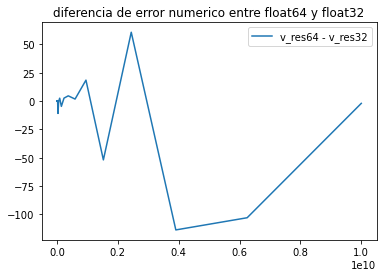

In [11]:
def numeric_error_exp():
  v_epsilon = np.logspace(1e-6, 10, endpoint=True)
  threshold = 1e-10
  v_res64 = np.zeros(len(v_epsilon))
  v_res32 = np.zeros(len(v_epsilon))

  for i in range(len(v_epsilon)):
    matrix_c = create_matrix_with_epsilon_float64(v_epsilon[i])
    x_obt = solve_sys_EG(matrix_c, threshold)
    v_res64[i] = inf_norm(x_obt, x_64)

  for i in range(len(v_epsilon)):
    matrix_c = create_matrix_with_epsilon_float32(v_epsilon[i])
    x_obt = solve_sys_EG(matrix_c, threshold)
    v_res32[i] = inf_norm(x_obt, x_32)

  fig, ax = plt.subplots( nrows=1, ncols=1 )
  ax.plot(v_epsilon, v_res64 - v_res32, label = "v_res64 - v_res32")
  #ax.plot(v_epsilon, v_res32, label = ".float32")
  
  # print(v_res64 - v_res32)
  ax.set_title('diferencia de error numerico entre float64 y float32')
  ax.legend()
  plt.show()
  # plt.savefig('error_numerico_exp')

numeric_error_exp()


## Ejercicio 3

### datos

In [13]:
matriz_tridiagonal_facil =  np.array(
                   [[ 4,  8,  0, 1],
                    [ 2,  8,  16, 8],
                    [ 0,  8,  2, 13]]).astype(np.float64)

print(elim_gauss_sin_pivot(matriz_tridiagonal_facil))
solve_sys_EGsin(matriz_tridiagonal_facil)

[[  4.    8.    0.    1. ]
 [  0.    4.   16.    7.5]
 [  0.    0.  -30.   -2. ]]


[0.0, 0.0, 1.0]

### implementacion

# todo cambiar listas arrays de numpy

In [126]:

def coeficientes_elim_gauss_tridiaognal(M):
  coeficientes_computados = []
  for i in range(0, len(M)):
    c_prima = 0
    if i == 0:
      c_prima = M[i][i + 1] /  M[i][i]
    else:
      c_prima = M[i][i + 1] /  (M[i][i] - (M[i][i - 1] * coeficientes_computados[i-1])) #un coeficientes_computados.pop() tambien funcionaria

    coeficientes_computados.append(c_prima)
  return coeficientes_computados

def term_indep_elim_gauss_tridiagonal(M, coeficientes_computados):
  terminos_indep_computados = []
  for i in range(0, len(M)):
    d_prima = 0
    if i == 0:
      d_prima = M[i][len(M[i]) - 1] /  M[i][i]
    else:
      d_prima = (M[i][len(M[i]) - 1] - (M[i][i - 1] * terminos_indep_computados[i - 1])) /  (M[i][i] - M[i][i - 1] * coeficientes_computados[i-1]) #un coeficientes_computados.pop() tambien funcionaria

    terminos_indep_computados.append(d_prima)
  return terminos_indep_computados  


def elim_gauss_tridiaognal_extendida(M):
  coeficientes = coeficientes_elim_gauss_tridiaognal(M)
  terminos_independientes = term_indep_elim_gauss_tridiagonal(M, coeficientes)

  res = np.zeros(len(terminos_independientes))
  res[len(terminos_independientes) - 1] = terminos_independientes[len(terminos_independientes) - 1]
  for i in range(len(res) - 2, -1, -1):
    res[i] = terminos_independientes[i] - (coeficientes[i] * res[i+1]) 
  
  return res

def elim_gauss_tridiagonal(A, u):

  u_column = u.reshape(-1, 1)  # -1 en reshape permite que numpy calcule la dimensión necesaria

  # Creando la matriz extendida M
  M = np.hstack((A, u_column))
  return elim_gauss_tridiaognal_extendida(M)
  
elim_gauss_tridiaognal_extendida(matriz_tridiagonal_facil)

array([-2.96666667,  1.60833333,  0.06666667])

## Ejercicio 4


### Datos

In [17]:
d_a = []

for i in range(0, 102):
    value = 0
    if i == ((101 // 2) + 1):
        value = 4/101
    d_a.append(value)


In [18]:

d_b = np.full(101, np.float64(4) / np.float64(101**2))

In [47]:
d_c = []
n = 101
for i in range(0, 102):
    value =  (np.float64(-1) + (np.float64(2*i) / np.float64(n - 1))) * (np.float64(12) / np.float64(n*n))
    d_c.append(value)
d_c

[-0.001176355259288305,
 -0.001152828154102539,
 -0.0011293010489167728,
 -0.0011057739437310068,
 -0.0010822468385452407,
 -0.0010587197333594746,
 -0.0010351926281737085,
 -0.0010116655229879424,
 -0.0009881384178021763,
 -0.0009646113126164102,
 -0.0009410842074306441,
 -0.000917557102244878,
 -0.0008940299970591119,
 -0.0008705028918733457,
 -0.0008469757866875796,
 -0.0008234486815018135,
 -0.0007999215763160474,
 -0.0007763944711302812,
 -0.0007528673659445152,
 -0.0007293402607587491,
 -0.000705813155572983,
 -0.000682286050387217,
 -0.0006587589452014509,
 -0.0006352318400156847,
 -0.0006117047348299186,
 -0.0005881776296441525,
 -0.0005646505244583864,
 -0.0005411234192726203,
 -0.0005175963140868541,
 -0.0004940692089010881,
 -0.00047054210371532204,
 -0.00044701499852955594,
 -0.0004234878933437898,
 -0.0003999607881580237,
 -0.00037643368297225754,
 -0.00035290657778649156,
 -0.00032937947260072546,
 -0.0003058523674149593,
 -0.0002823252622291932,
 -0.00025879815704342706,

In [31]:
d = []
for i in range(0, 101):
    d.append(i)

def create_matrix_with_d(d):
    m_res = np.zeros((101,102)).astype(np.float64)
    for i in range(101):
        m_res[i][i]=-2
        if(i+1<=100):
            m_res[i+1][i]=1
            m_res[i][i+1]=1    
    for i in range(101):
        m_res[i][101]= d[i]
    return m_res  

create_matrix_with_d(d)      

array([[ -2.,   1.,   0., ...,   0.,   0.,   0.],
       [  1.,  -2.,   1., ...,   0.,   0.,   1.],
       [  0.,   1.,  -2., ...,   0.,   0.,   2.],
       ...,
       [  0.,   0.,   0., ...,   1.,   0.,  98.],
       [  0.,   0.,   0., ...,  -2.,   1.,  99.],
       [  0.,   0.,   0., ...,   1.,  -2., 100.]])

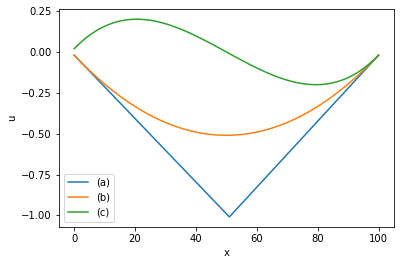

In [132]:
def verificacion_exp(ds):
  
  x = range(0, 101)
  x_ds = np.zeros((3, 101))
  for i in range(2):
    matrix_c = create_matrix_with_d(ds[i])
    x_ds[i] = elim_gauss_tridiaognal(matrix_c)
  
  matrix_c = create_matrix_with_d(ds[2])
  A = matrix_c[:, :-1]

# El vector de términos independientes B es la última columna
  B = matrix_c[:, -1]  
  x_ds[2] = elim_gauss_tridiagonal(A, B)

  fig, ax = plt.subplots( nrows=1, ncols=1 )
  plt.plot(x, x_ds[0], label = "(a)")
  plt.plot(x, x_ds[1], label = "(b)")
  plt.plot(x, x_ds[2], label = "(c)")
  yticks = np.arange(-1, 0.50, 0.25)
  ax.set_yticks(yticks) 
  ax.set_xlabel("x")
  ax.set_ylabel("u")
  plt.legend()
  #fig.savefig('verificacion_exp.pdf')
  plt.show()
  
  
  return

verificacion_exp([d_a, d_b, d_c])

In [41]:

M = create_matrix_with_d(d)
# La matriz de coeficientes A es todas las filas y todas las columnas excepto la última
A = M[:, :-1]

# El vector de términos independientes B es la última columna
B = M[:, -1]

sol_pivot = elim_gauss_con_pivot(M, 0.0000001)
sol_tridiagonal = elim_gauss_tridiaognal(M)
solplicita(u_0, A, m):
    m_res = np.zeros((m,101)).astype(np.float64)
    u=u_0
    m_res[0]=u
    for k in range(1,m):
        u = elim_gau_numpy = np.linalg.solve(A, B)



print(sol_pivot)
print(sol_tridiagonal)
print(sol_numpy)

[[ 1.000e+00 -2.000e+00  1.000e+00 ...  0.000e+00  0.000e+00  1.000e+00]
 [ 0.000e+00  1.000e+00 -2.000e+00 ...  0.000e+00  0.000e+00  2.000e+00]
 [ 0.000e+00  0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00  3.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ... -2.000e+00  1.000e+00  9.900e+01]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  1.000e+00 -2.000e+00  1.000e+02]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00 -1.020e+02  3.434e+05]]
[-4.14225961e+33 -2.07112981e+33 -1.03556490e+33 -5.17782451e+32
 -2.58891226e+32 -1.29445613e+32 -6.47228064e+31 -3.23614032e+31
 -1.61807016e+31 -8.09035080e+30 -4.04517540e+30 -2.02258770e+30
 -1.01129385e+30 -5.05646925e+29 -2.52823463e+29 -1.26411731e+29
 -6.32058657e+28 -3.16029328e+28 -1.58014664e+28 -7.90073321e+27
 -3.95036660e+27 -1.97518330e+27 -9.87591651e+26 -4.93795825e+26
 -2.46897913e+26 -1.23448956e+26 -6.17244782e+25 -3.08622391e+25
 -1.54311195e+25 -7.71555977e+24 -3.85777989e+24 -1.92888994e+24
 -9.64444971e+23 -4.82222486e+23 -2.

## Ejercicio 5

experimentacion del punto a
generar matrices tridiagonales de distintos tamaños(10, 1e2, 1e3, .. 1e10) o un rango menor si es muy grande 
r=5000

2 casos
1) probar generando el laplaciano de distintos tamaños
2) podemos probar generando matrices tridiagonales aleatorias.

## Ejercicio 6

# Datos

In [129]:
n = 101
r = 10
m = 1000

def create_u0(n,r):
    u = np.zeros(n).astype(np.float64)
    for i in range(n):
        if(i > (n//2-r) and i < n//2+r):
            u[i]=1
    return u


def create_matrix_laplaciano(alpha):
    m_res = np.zeros((101,101)).astype(np.float64)
    for i in range(101):
        m_res[i][i]=-2
        if(i+1<=100):
            m_res[i+1][i]=1
            m_res[i][i+1]=1 
    for i in range(101):
        for j in range(101):
            m_res[i][j]*= alpha            
    return m_res  

create_matrix_laplaciano(1)

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

 item a) caso explicito

In [103]:
def mult(A, v):
    v_res = np.zeros(len(v))
    for i in range(len(v)):
        res = 0
        for j in range(len(v)):
            res+= A[i][j]*v[j]
        v_res[i]=res
    return v_res


[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.2 -0.2
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  -0.2  0.2  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0. ]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.04 -0.12  0.12 -0.04  0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.04  0.12
 -0.12  0.04  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.

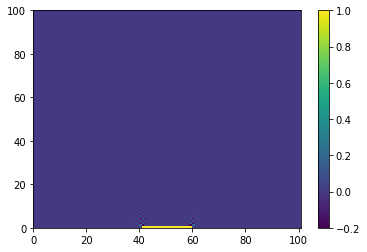

In [118]:
def sim_explicita(u_0, A, m):
    m_res = np.zeros((m,101))
    u=u_0
    m_res[0]=u
    for k in range(1,m):
        u = A @ u
        m_res[k]= u
        print(m_res[k])
    return m_res   

x= sim_explicita(create_u0(n,r), create_matrix_laplaciano(0.2), m)

#x
plt.pcolor(x)
plt.colorbar()


item b) caso implicito

[  -9.5  -19.   -28.5  -38.   -47.5  -57.   -66.5  -76.   -85.5  -95.
 -104.5 -114.  -123.5 -133.  -142.5 -152.  -161.5 -171.  -180.5 -190.
 -199.5 -209.  -218.5 -228.  -237.5 -247.  -256.5 -266.  -275.5 -285.
 -294.5 -304.  -313.5 -323.  -332.5 -342.  -351.5 -361.  -370.5 -380.
 -389.5 -399.  -407.5 -415.  -421.5 -427.  -431.5 -435.  -437.5 -439.
 -439.5 -439.  -437.5 -435.  -431.5 -427.  -421.5 -415.  -407.5 -399.
 -389.5 -380.  -370.5 -361.  -351.5 -342.  -332.5 -323.  -313.5 -304.
 -294.5 -285.  -275.5 -266.  -256.5 -247.  -237.5 -228.  -218.5 -209.
 -199.5 -190.  -180.5 -171.  -161.5 -152.  -142.5 -133.  -123.5 -114.
 -104.5  -95.   -85.5  -76.   -66.5  -57.   -47.5  -38.   -28.5  -19.
   -9.5]
[ 12212.25  24415.    36598.75  48754.    60871.25  72941.    84953.75
  96900.   108770.25 120555.   132244.75 143830.   155301.25 166649.
 177863.75 188936.   199856.25 210615.   221202.75 231610.   241827.25
 251845.   261653.75 271244.   280606.25 289731.   298608.75 307230.
 315585.25 

/tmp/ipykernel_1950872/2548829531.py:20: RuntimeWarning: overflow encountered in double_scalars
  d_prima = (M[i][len(M[i]) - 1] - (M[i][i - 1] * terminos_indep_computados[i - 1])) /  (M[i][i] - M[i][i - 1] * coeficientes_computados[i-1]) #un coeficientes_computados.pop() tambien funcionaria


[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf]
[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf]
[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -in

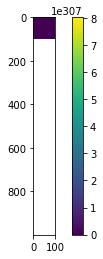

In [134]:
def sim_explicita(u_0, A, m):
    m_res = np.zeros((m,101)).astype(np.float64)
    u=u_0
    m_res[0]=u
    for k in range(1,m):
        u = elim_gauss_tridiagonal(A, u)
        m_res[k]= u
        print(m_res[k])
    return m_res   

x = sim_explicita(create_u0(n,r), create_matrix_laplaciano(1), m)

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()

heatmap2d(x)